In [1]:
import pandas as pd;
from collections import Counter;
df=pd.read_csv("train_twitter.csv");
df1=pd.read_csv("test_twitter.csv");
df.head()
df.drop(["tweet_id","airline_sentiment_gold","negativereason_gold","tweet_coord","name","tweet_created"],axis=1,inplace=True)
Counter(df["retweet_count"])
df.tail()

,airline_sentiment,airline,retweet_count,text,tweet_location,user_timezone
10975,neutral,American,0,@AmericanAir followback,"ohio,panama",NaN
10976,positive,United,0,@united thanks for the help. Wish the phone re...,Brooklyn,Eastern Time (US & Canada)
10977,negative,US Airways,0,@usairways the. Worst. Ever. #dca #customerser...,"St. Augustine, Florida",NaN
10978,negative,US Airways,0,@nrhodes85: look! Another apology. DO NOT FLY ...,NaN,NaN
10979,negative,United,1,@united you are by far the worst airline. 4 pl...,NaN,NaN


# Time to visualise the data.........

In [2]:
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split;
sns.set();

In [3]:
def bar_graph(feature):
    positive=df[df["airline_sentiment"]=="positive"][feature].value_counts();
    negative=df[df["airline_sentiment"]=="negative"][feature].value_counts();
    neutral=df[df["airline_sentiment"]=="neutral"][feature].value_counts();
    df1=pd.DataFrame([positive,negative,neutral]);
    df1.index=["positive","negative","neutral"];
    df1.plot(kind="bar",stacked=True);

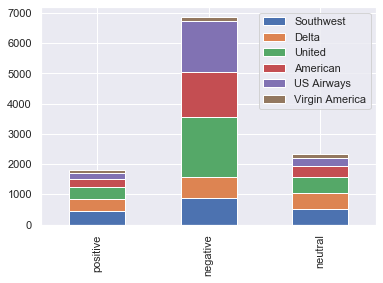

In [4]:
bar_graph("airline")

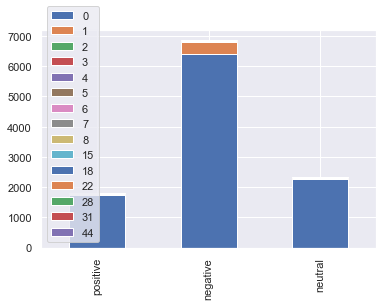

In [5]:
bar_graph("retweet_count")

# It seems that none of the other feature contrinuts to the positive or negative sentiment of the twitter and all feature except the tweet himself can be removed if needed....

# Time to clean the input_data i.e. removing stopwords and cobining the words with same meaning and same context.....

In [6]:
from nltk.corpus import wordnet;
def get_simple_pos(pos):
    if(pos[0]=='J'):
        return wordnet.ADJ;
    elif(pos[0]=='V'):
        return wordnet.VERB;
    elif(pos[0]=='N'):
        return wordnet.NOUN;
    elif(pos[0]=='R'):
        return wordnet.ADV;
    else:
        return wordnet.NOUN;

In [7]:
def lemmatized_words(tweet):
    pos=pos_tag(word_tokenize(tweet));
    lemmatizer=WordNetLemmatizer();
    pos=[(word,get_simple_pos(tag)) for word,tag in pos];
    output_words=[lemmatizer.lemmatize(word,tag) for word,tag in pos];
    return output_words;

In [8]:
from nltk.corpus import stopwords;
from nltk import pos_tag;
from nltk.stem import WordNetLemmatizer;
from nltk.tokenize import word_tokenize;
import string;
def remove_stop_words_and_clean_it(input_data):
    stop_words=stopwords.words("english");
    stop_words+=list(string.punctuation);
    input_data=[lemmatized_words(tweet) for tweet in input_data];
    # now the input_data is no more a string it is a list if words......
    returned_list=[];
    for list_tweet in input_data:
            returned_string="";
            for word in list_tweet:
                if word not in stop_words:
                    returned_string+=word+" ";
            returned_list.append(returned_string);
    return returned_list;

In [9]:
x_train=remove_stop_words_and_clean_it(list(df["text"]));
x_test=remove_stop_words_and_clean_it(list(df1["text"]));
y_train=list(df["airline_sentiment"]);
for i in range(0,len(y_train)):
    if(y_train[i]=="positive"):
        y_train[i]=0;
    elif(y_train[i]=="negative"):
        y_train[i]=1;
    else:
        y_train[i]=2;

# Upto now we had cleaned the input and now we need to do train_test split and then use Count vectorizer ad then just need to use then inbuilt classifier...

In [12]:
from sklearn.feature_extraction.text import CountVectorizer;
Count_vec=CountVectorizer(max_features=4000);
train_array=Count_vec.fit_transform(x_train);
features=Count_vec.get_feature_names();
test_array=Count_vec.transform(x_test);

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np;
from sklearn.naive_bayes import MultinomialNB     # Import MultinomialDB from sklearn
clf = MultinomialNB()                                       # Create object of MultinomialDB
clf.fit(train_array, y_train)                           # Fit the training data                   
y_pred = list(clf.predict(test_array))
for i in range(0,len(y_pred)):
    if(y_pred[i]==0):
        y_pred[i]="positive";
    elif(y_pred[i]==1):
        y_pred[i]="negative"
    else:
        y_pred[i]="neutral";
import csv
with open('twiiter_sentimental_analysis_output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in y_pred:
        writer.writerow({i});